In [73]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import psycopg2

%matplotlib inline
sns.set_context('talk')

In [74]:
conn = psycopg2.connect("dbname='scrapegame' user='rickwolf' password='mypass'")
cur = conn.cursor()

review_id
game_id
reviewer
text
date
score

In [44]:
query = """
SELECT reviewer, COUNT(*) AS num_reviews, MIN(date) AS earliest_review, 
    AVG(score) AS avg_score
FROM reviews
GROUP BY reviewer
"""

In [45]:
cur.execute(query)

In [46]:
df = pd.DataFrame(cur.fetchall(), columns=['username', 'num_reviews', 'earliest_review', 'avg_score'])

In [55]:
df['avg_score'] = df['avg_score'].astype(float)
df.head()

,username,num_reviews,earliest_review,avg_score
0,Luka0101998,1,2016-06-25,10.0
1,stephanber,1,2016-11-17,6.0
2,AlezJanson,1,2016-04-30,10.0
3,Sweedio,1,2016-11-17,10.0
4,XapaRon,1,2016-10-10,4.0


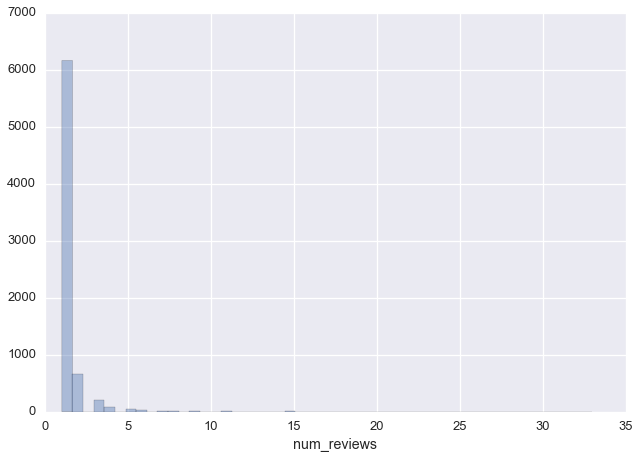

In [13]:
sns.distplot(df.num_reviews, kde=False)
sns.despine()

In [56]:
df.describe()

,num_reviews,avg_score
count,7260.000000,7260.000000
mean,1.320110,6.300585
std,1.264566,3.689441
min,1.000000,0.000000
25%,1.000000,3.000000
50%,1.000000,8.000000
75%,1.000000,10.000000
max,33.000000,10.000000


In [51]:
df.num_reviews.quantile(.97)

4.0

85% of users only write one review, but some write as many as 33

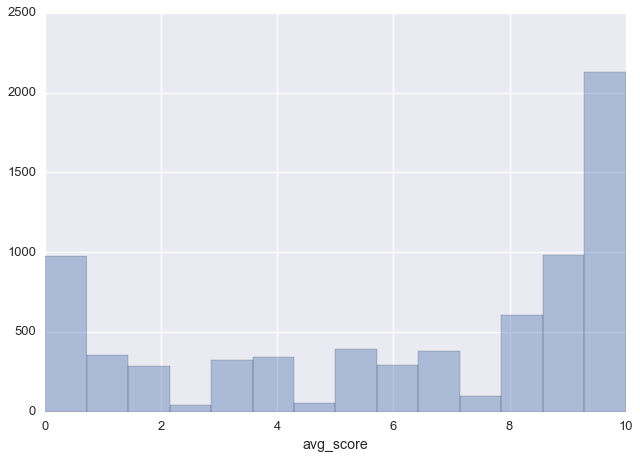

In [57]:
sns.distplot(df.avg_score, kde=False)

distribution is slightly bimodal towards the extremes of ratings.

/Users/rickwolf/anaconda/envs/my_projects_env/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


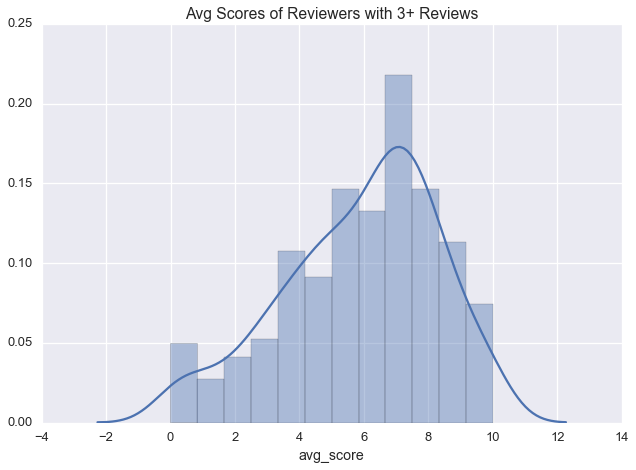

In [60]:
sns.distplot(df.loc[df['num_reviews'] > 2, 'avg_score'])
sns.plt.title("Avg Scores of Reviewers with 3+ Reviews")

/Users/rickwolf/anaconda/envs/my_projects_env/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


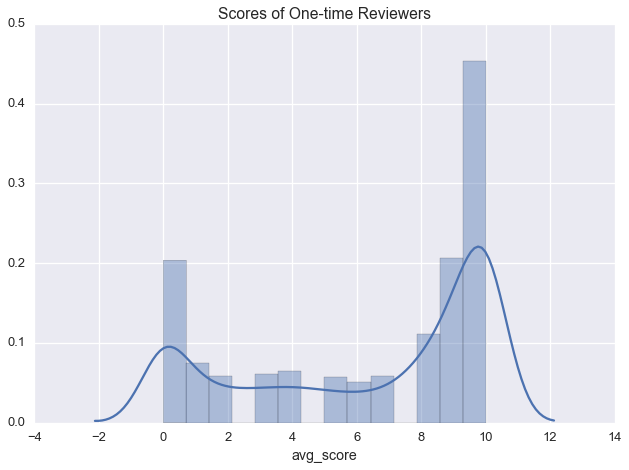

In [61]:
sns.distplot(df.loc[df['num_reviews'] == 1, 'avg_score'])
sns.plt.title('Scores of One-time Reviewers')

In [77]:
# Generate a histogram of review scores for scores in reviews made by a repeat reviewer
query = """
SELECT review_id, a.reviewer, score
FROM reviews AS a
LEFT JOIN (
    SELECT reviewer, COUNT(*) AS num_reviews
    FROM reviews
    GROUP BY reviewer
) AS b
ON a.reviewer = b.reviewer
WHERE num_reviews > 1
"""

In [78]:
cur.execute(query)

In [79]:
multi_revs = pd.DataFrame(cur.fetchall(), columns=['review_id', 'reviewer', 'rev_score'])

In [81]:
len(multi_revs)

3422

/Users/rickwolf/anaconda/envs/my_projects_env/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


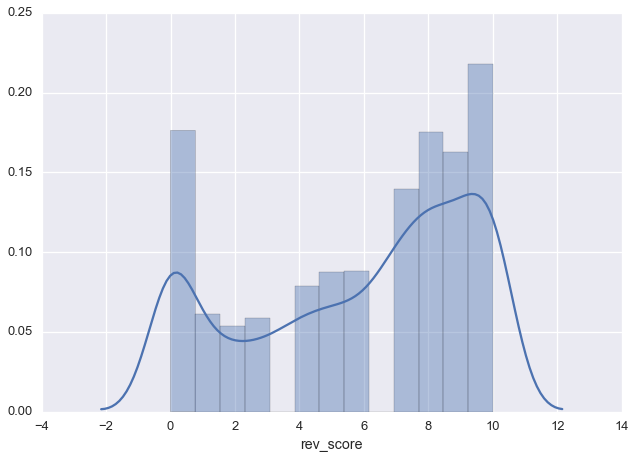

In [82]:
sns.distplot(multi_revs['rev_score'])